In [2]:
import sys
import os
import importlib
import numpy
sys.path.append(os.path.abspath('../')) 

%reload_ext autoreload
%autoreload 2
import src.eclipsing_binary.core
from src.eclipsing_binary.config import get_paths
from src.eclipsing_binary.utils import read_data
from src.eclipsing_binary.utils import gaia_cross_match

In [3]:
paths = get_paths()

In [4]:
binaries = read_data(paths)

In [5]:
selected_binaries = [
    binary for binary in binaries 
    if binary.check_parameters(obj_type = 'C')
]

In [6]:
#binary=binaries[500]
binary=selected_binaries[7]
binary.check_status()

object_name: OGLE-SMC-ECL-0185
I_magnitude: 17.183
V_magnitude: 17.118
period_days: 2.3992922
epoch_of_minimum: 7001.7351
main_eclipse_dip: 0.113
second_eclipse_dip: 0.108
E(V-I)peak: 0.05
obj_type: C
RA: 00:33:16.15
DEC: -73:46:42.0
extinction: Dictionary with keys: E(V-I), -sigma1, +sigma2, E(V-I)sfd


In [7]:
binary.light_curves()

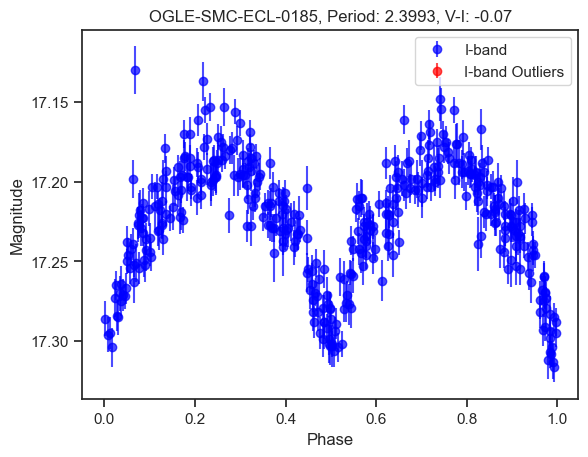

In [8]:
binary.plot_light_curves(band= 'I')

```python
filename = paths['w_dir']+"notebooks/smc_coordinate.txt"  # Replace with your file name
crossmatch_table = gaia_cross_match(binaries, table_name='ogle_smc', save_to_file=True)
```

In [11]:
binary.fit_fourier(band='I')

/Users/wera/Max_astro/Slovakia/ogle_eb/src/eclipsing_binary/core.py:393: OptimizeWarning: Covariance of the parameters could not be estimated
  mag = lc_data['mag']
/Users/wera/Max_astro/Slovakia/ogle_eb/src/eclipsing_binary/core.py:422: OptimizeWarning: Covariance of the parameters could not be estimated
  outlier_mask = (oc_residuals < lower_bound) | (oc_residuals > upper_bound)


In [12]:
binary.check_status()

object_name: OGLE-SMC-ECL-0185
I_magnitude: 17.183
V_magnitude: 17.118
period_days: 2.3992922
epoch_of_minimum: 7001.7351
main_eclipse_dip: 0.113
second_eclipse_dip: 0.108
E(V-I)peak: 0.05
obj_type: C
RA: 00:33:16.15
DEC: -73:46:42.0
extinction: Dictionary with keys: E(V-I), -sigma1, +sigma2, E(V-I)sfd
lc_I: Dictionary with keys: JD, mag, err, outlier_mask, phase, phase_fit_9, mag_fit_9, n_harmonics
lc_V: Dictionary with keys: JD, mag, err, outlier_mask, phase


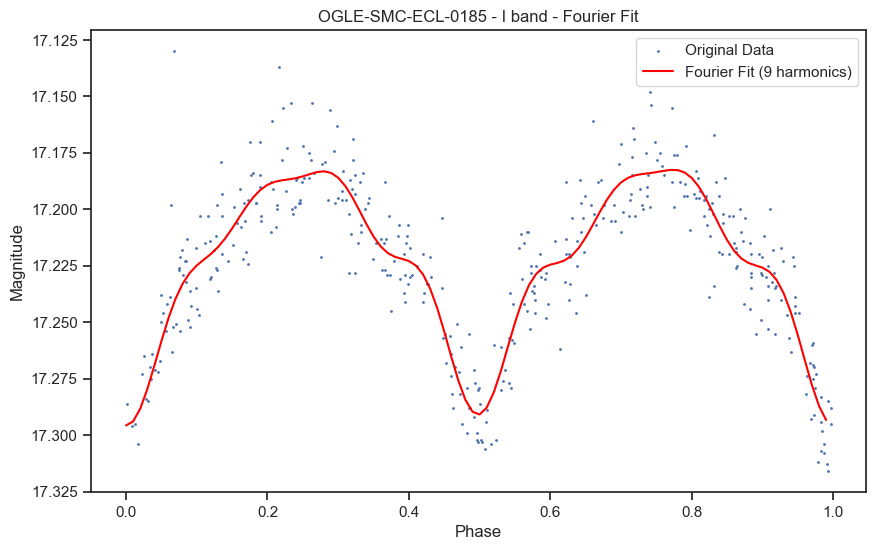

In [14]:
binary.plot_fourier_fit(band='I', n_harmonics=binary.lc_I['n_harmonics'])